<a href="https://colab.research.google.com/github/Nate20067/getCooked/blob/main/CNN_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#Import the dependencies
from keras import datasets
import matplotlib.pyplot as plt

In [53]:
#Loading the DateSet
(imageTraining, imageTrainLabels) ,(imageTestingData, imageTestingLabels) = datasets.cifar10.load_data()

#List of the names model is trying to identify tin training
classNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

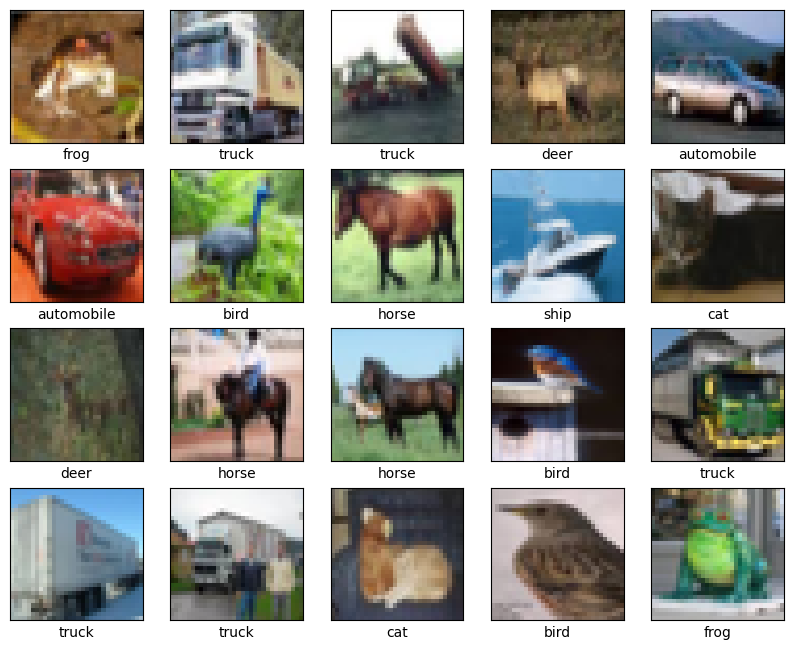

In [54]:
# Function to show the images with the class names the model tries to identify
def showingImages(imageTraining, imageTrainLabels, classNames):
    numberSamples = 20
    numberRows = 5
    plt.figure(figsize=(10,10))
    for i in range(numberSamples):
        # Loops through number of samples and creates subplot for each image
        plt.subplot(numberRows, numberRows, i+1)
        # Removes grid lines and ticks from image
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imageTraining[i])
        plt.xlabel(classNames[imageTrainLabels[i][0]])
    plt.show()

#Function to show the images
showingImages(imageTraining, imageTrainLabels, classNames)

In [55]:
#Processing the Data
#Normalizing the images to 0 and 1
imageTraining = imageTraining/255.0
imageTestingData = imageTestingData/255.0

In [56]:
#Hot Encodes the Image Labels
from keras.utils import to_categorical
imageTrainLabels = to_categorical(imageTrainLabels)
imageTestingLabels = to_categorical(imageTestingLabels)

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
#Building the model
cnnModel = Sequential([
    #First Hidden Layer
    Conv2D(32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'),
    #Normalization Layer
    BatchNormalization(),
    #Pooling Layer
    MaxPooling2D(pool_size=(2,2)),
    #Drops rndom neurons each epoch
    Dropout(0.25),
    #Second Hidden Layer
    Conv2D(64, kernel_size=(4,4), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    #Final Hidden Layer
    Conv2D(128, kernel_size=(4,4), activation='relu'),
    BatchNormalization(),
    #Pooling Layer
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    #Turns multidimensional data into 1D data
    Flatten(),
    #Fully Connected Layer
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    #Output Layer neurons number of class labels
    #Activation function 'softmax' generates probability value for predicted labels
    Dense(10, activation='softmax')
])

In [60]:
#Compiling the model
from keras.optimizers import Adam
#Using Adam optimizer as ts great with large data
#Loss function categorical_crossentropy for one hot encoding
cnnModel.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [61]:
cnnModel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 batch_normalization_4 (Bat  (None, 29, 29, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 64)        32832     
                                                                 
 batch_normalization_5 (Bat  (None, 11, 11, 64)       

In [77]:
model = cnnModel.fit(imageTraining, imageTrainLabels,epochs=10, validation_data=(imageTestingData, imageTestingLabels),batch_size=15, verbose=2)

Epoch 1/10
3334/3334 - 118s - loss: 0.7380 - accuracy: 0.7464 - val_loss: 0.6760 - val_accuracy: 0.7695 - 118s/epoch - 36ms/step
Epoch 2/10
3334/3334 - 121s - loss: 0.7337 - accuracy: 0.7480 - val_loss: 0.6461 - val_accuracy: 0.7813 - 121s/epoch - 36ms/step
Epoch 3/10
3334/3334 - 122s - loss: 0.7313 - accuracy: 0.7487 - val_loss: 0.7006 - val_accuracy: 0.7586 - 122s/epoch - 37ms/step
Epoch 4/10
3334/3334 - 124s - loss: 0.7272 - accuracy: 0.7505 - val_loss: 0.6930 - val_accuracy: 0.7628 - 124s/epoch - 37ms/step
Epoch 5/10
3334/3334 - 120s - loss: 0.7332 - accuracy: 0.7501 - val_loss: 0.6782 - val_accuracy: 0.7672 - 120s/epoch - 36ms/step
Epoch 6/10
3334/3334 - 119s - loss: 0.7257 - accuracy: 0.7504 - val_loss: 0.7044 - val_accuracy: 0.7572 - 119s/epoch - 36ms/step
Epoch 7/10
3334/3334 - 121s - loss: 0.7277 - accuracy: 0.7508 - val_loss: 0.7091 - val_accuracy: 0.7556 - 121s/epoch - 36ms/step
Epoch 8/10
3334/3334 - 117s - loss: 0.7239 - accuracy: 0.7529 - val_loss: 0.7673 - val_accuracy: 

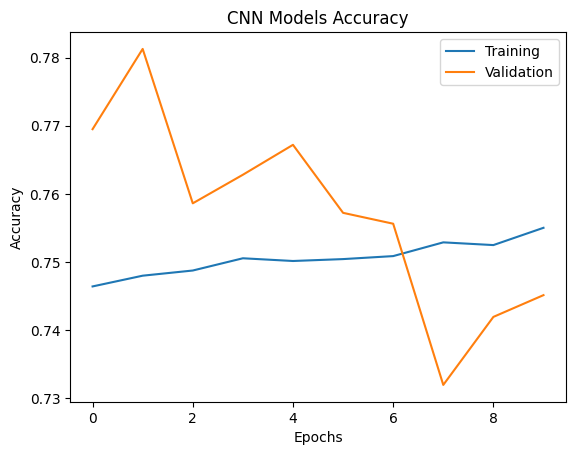

In [79]:
#Plotting the CNN the CNN modelAccuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('CNN Models Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training','Validation'])
plt.show()

In [78]:
#Evaluating the Model
testLoss, testAccuracy = cnnModel.evaluate(imageTestingData, imageTestingLabels)
print("The models Testing Loss and Accuracy is", testLoss, testAccuracy)

313/313 [==============================] - 12s 37ms/step - loss: 0.7492 - accuracy: 0.7451
The models Testing Loss and Accuracy is 0.7491836547851562 0.7451000213623047
